In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv('Final.csv')
data.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [3]:
datanew = data.loc[data['Name_calc'] == 'Triglycerides (TG)']
datanew = datanew.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'a1c_Res', 'BP_res', 'A1C_RF','BP_RF','Lip_RF','Alb_RF','Total_RF'], axis=1)
print(datanew)

        PerformedDate  Lipids_Res
2410645    2017-10-19       205.0
2410646    2016-10-14       187.0
2410647    2014-03-18       156.0
2410648    2014-01-17       198.0
2410649    2013-07-13        54.0
...               ...         ...
3344181    2018-06-05       153.0
3344182    2019-07-17        26.0
3344183           NaN       424.0
3344184    2019-07-23       109.0
3344185    2019-10-17        76.0

[933541 rows x 2 columns]


In [4]:
datanew['PerformedDate'] = pd.to_datetime(datanew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datanew.set_index(['PerformedDate'])
print(indexedDataset)

               Lipids_Res
PerformedDate            
2017-10-19          205.0
2016-10-14          187.0
2014-03-18          156.0
2014-01-17          198.0
2013-07-13           54.0
...                   ...
2018-06-05          153.0
2019-07-17           26.0
NaT                 424.0
2019-07-23          109.0
2019-10-17           76.0

[933541 rows x 1 columns]


In [5]:
from datetime import datetime

In [6]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               Lipids_Res
PerformedDate            
2017-10-19          205.0
2016-10-14          187.0
2014-03-18          156.0
2014-01-17          198.0
2013-07-13           54.0
...                   ...
2018-06-05          153.0
2019-07-17           26.0
NaT                 424.0
2019-07-23          109.0
2019-10-17           76.0

[901352 rows x 1 columns]


In [7]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               Lipids_Res
PerformedDate            
1990-07-31          524.0
1991-02-27        28199.0
1993-02-02          434.0
1994-09-16          322.0
1995-07-24          382.0
...                   ...
NaT                 239.0
NaT                 111.0
NaT                 289.0
NaT                 102.0
NaT                 424.0

[901352 rows x 1 columns]


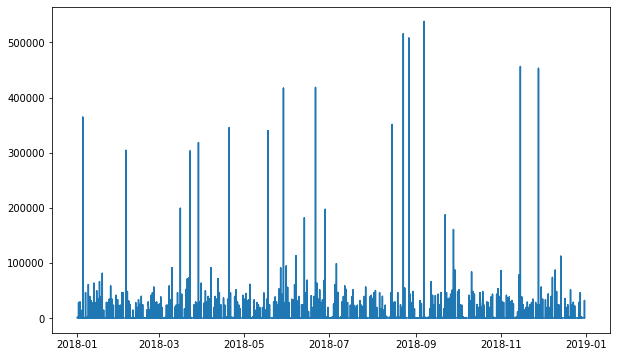

In [8]:
sub = indexedDataset['2018']
plt.plot(sub)

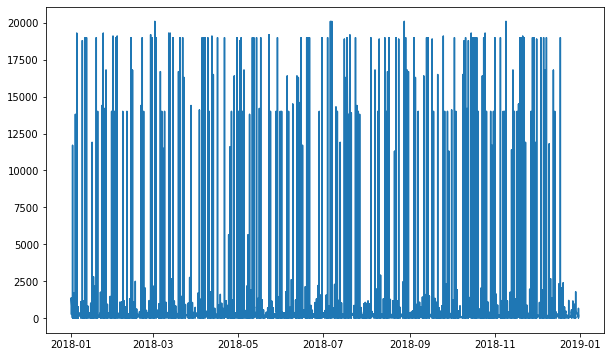

In [9]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['Lipids_Res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [10]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

               Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31     180.416667
2018-12-31     173.000000
2018-12-31     177.250000
2018-12-31     171.666667
2018-12-31     161.250000

[87004 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31     134.198942
2018-12-31     130.853839
2018-12-31     127.202148
2018-12-31     125.270132
2018-12-31     118.074803

[87004 rows x 1 columns]


In [11]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

               Lipids_Res
PerformedDate            
2018-01-01       5.641907
2018-01-01       7.218910
2018-01-02       2.944439
2018-01-02       3.295837
2018-01-02       5.549076
...                   ...
2018-12-31       5.840642
2018-12-31       5.231109
2018-12-31       4.595120
2018-12-31       5.198497
2018-12-31       5.198497

[87004 rows x 1 columns]


In [12]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

               Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31       4.815067
2018-12-31       4.782626
2018-12-31       4.842952
2018-12-31       4.816708
2018-12-31       4.772951

[87004 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31       1.079585
2018-12-31       1.058835
2018-12-31       1.022174
2018-12-31       1.007329
2018-12-31       0.975248

[87004 rows x 1 columns]


In [13]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Lipids_Res
PerformedDate,
2018-01-02,-1.803835
2018-01-02,0.718670
2018-01-02,0.504099
2018-01-02,0.713315
2018-01-02,0.619312
2018-01-02,2.259254
2018-01-02,-0.173917
2018-01-02,-2.235196
2018-01-02,-0.917569


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Lipids_Res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

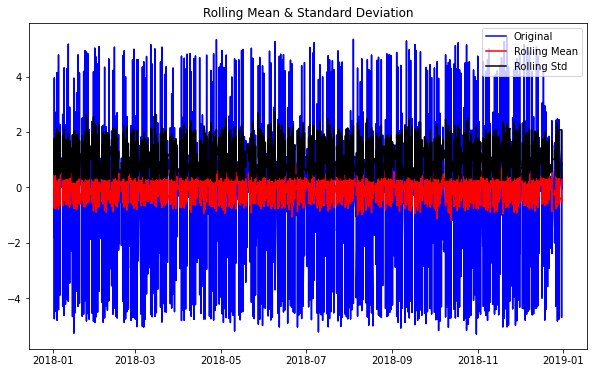

Results of Dickey-Fuller Test:
Test Statistic                   -58.500099
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    86926.000000
Critical Value (1%)               -3.430425
Critical Value (5%)               -2.861573
Critical Value (10%)              -2.566788
dtype: float64


In [15]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

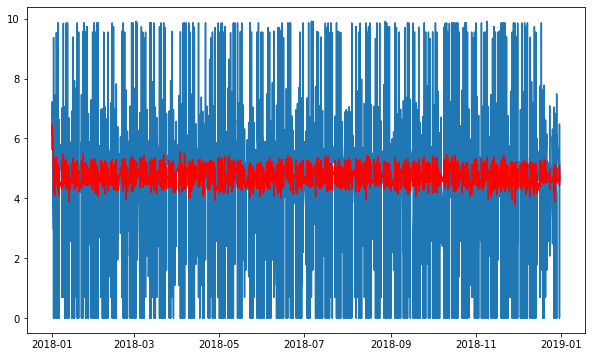

In [16]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

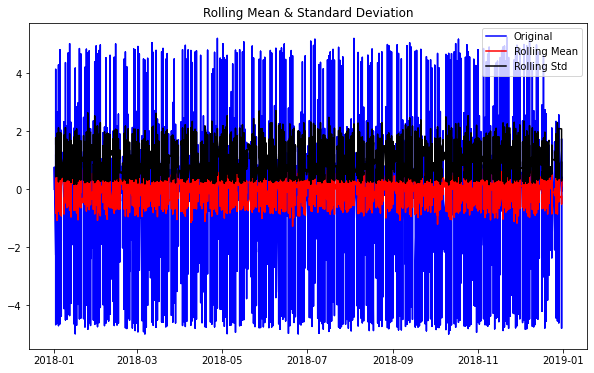

Results of Dickey-Fuller Test:
Test Statistic                   -51.552355
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    86937.000000
Critical Value (1%)               -3.430425
Critical Value (5%)               -2.861573
Critical Value (10%)              -2.566788
dtype: float64


In [17]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

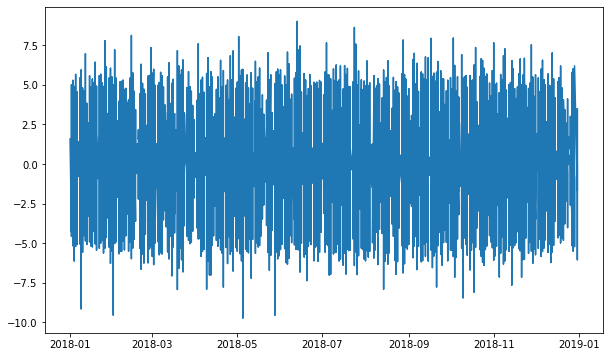

In [18]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

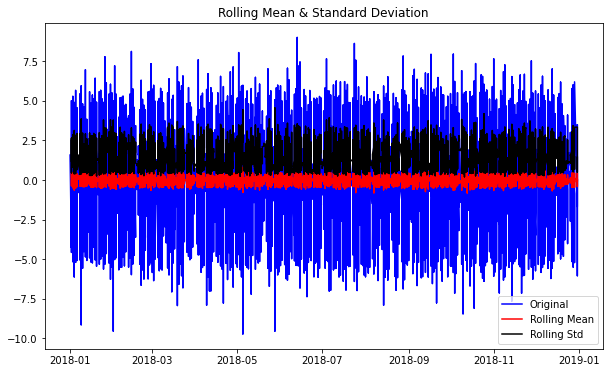

Results of Dickey-Fuller Test:
Test Statistic                   -60.811455
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    86936.000000
Critical Value (1%)               -3.430425
Critical Value (5%)               -2.861573
Critical Value (10%)              -2.566788
dtype: float64


In [19]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [20]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


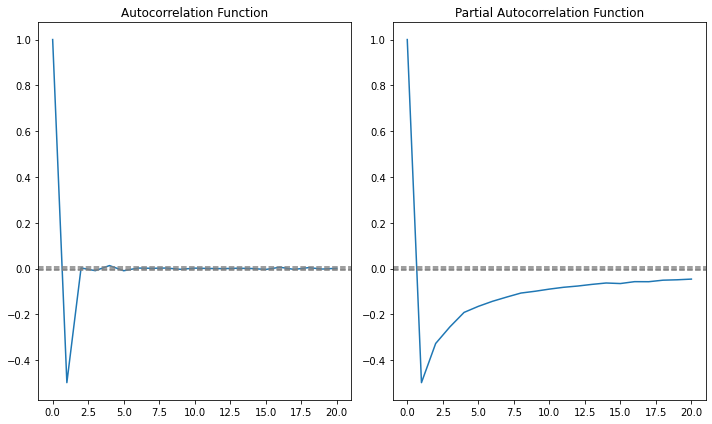

In [21]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

Plotting AR model


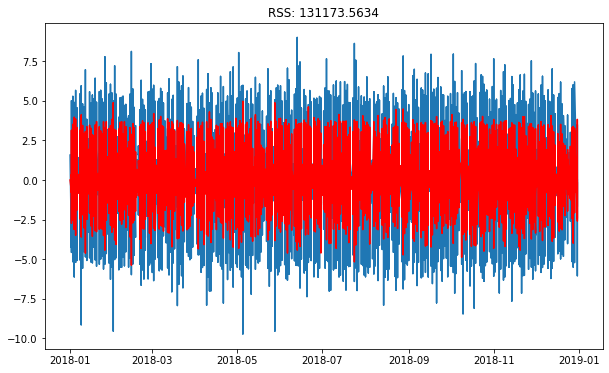

In [22]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


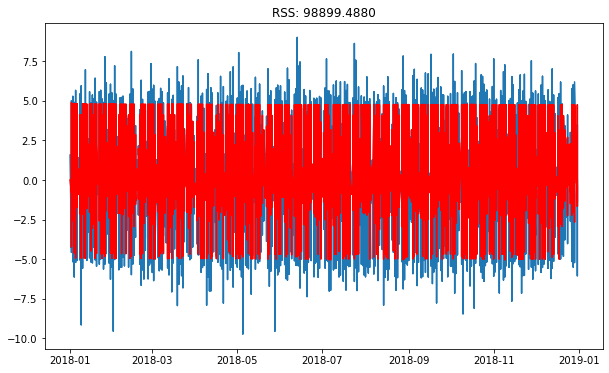

In [23]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

In [24]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MemoryError: Unable to allocate 56.3 GiB for an array with shape (86938, 86938) and data type float64

In [25]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-01-01   -6.415607e-07
2018-01-02   -7.796281e-01
2018-01-02    2.290606e+00
2018-01-02    1.461502e+00
2018-01-02   -6.090540e-01
dtype: float64


In [26]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-01-01   -6.415607e-07
2018-01-02   -7.796288e-01
2018-01-02    1.510977e+00
2018-01-02    2.972480e+00
2018-01-02    2.363425e+00
dtype: float64


In [27]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-01-01    5.641906
2018-01-01    5.641906
2018-01-02    4.862278
2018-01-02    7.152884
2018-01-02    8.614387
dtype: float64

MemoryError: Unable to allocate 68.7 GiB for an array with shape (9219735268,) and data type int64

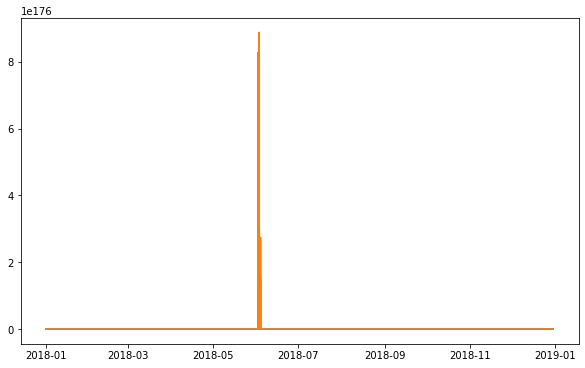

In [28]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['Lipids_Res'])**2)/len(indexedDataset['Lipids_Res'])))